# Problem set 3 - Solutions

## Problem 1

 Calculated chi square is:  1588.2376465826746


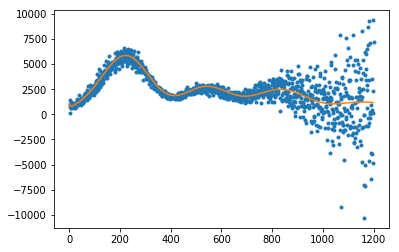

In [2]:
import numpy as np
import camb
from matplotlib import pyplot as plt
import time

############### This was set by prof

def get_spectrum(pars,lmax=2000):
    #print('pars are ',pars)
    H0=pars[0]
    ombh2=pars[1]
    omch2=pars[2]
    tau=pars[3]
    As=pars[4]
    ns=pars[5]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]    #you could return the full power spectrum here if you wanted to do say EE
    return tt


plt.ion()

pars=np.asarray([65,0.02,0.1,0.05,2e-9,0.96])
wmap0,wmap1,wmap2=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt', usecols=(0,1,2), unpack=True)

plt.clf();
#plt.errorbar(wmap[:,0],wmap[:,1],wmap[:,2],fmt='*')
plt.plot(wmap0,wmap1,'.')

cmb=get_spectrum(pars)

cmb=cmb[2:1199+2]  # removing first two entries
plt.plot(cmb)

############### Chi^2 calculation

chisq = np.sum((wmap1-cmb)**2/wmap2**2)
print(" Calculated chi square is: ",chisq)

## Problem 2

explain here the idea

To estimate the derivative with respect to each parameter use:

\begin{equation}
\frac{\partial f}{\partial x_1} = \frac{f(x_1+\delta x_1,x_2,x_3...)-f(x_1-\delta x_1,x_2,x_3...)}{2\delta x_1}
\end{equation}


Now, we want to minimize the $\chi^2$ with respect to the parameters: $\nabla \chi^2 = 0$.

From minimizing $\chi^2$ one can obtain the following equation for the change in the parameters:

\begin{equation}
\delta m = (A^{'T} N^{-1} A')^{-1}A^{'T} N^{-1}r
\end{equation}

Here, $A$ is the matrix with the -unknown- polynomials evaluated at x ($A'$ is its derivative), N is a matrix containing the noise ($N_{ii} = \sigma_i^2$), and $r = d-A(m_0)$ are the residuals of the model ($A$ is evaluated on the first guess parameters $m_0$).


Algorithm for non-linear models in this problem:
- Guess the parameters: m$_0$ => these are given
- Calculate the matrix A on the guess parameters: A(m$_0$)
- Calculate the local gradients $\partial A/\partial m$ => this is returned by $func\_derivs$
- Solve $A_m^T \, N^{-1} \, A_m \, \delta m = A_m \, N^{-1} \, r$, where $\partial A/\partial m = A_m$, and $r = d-A(m_0)$
- Set m$_0$ -> m$_0+\delta m$
- Repeat until $\delta m$ is small, and $\chi^2\ll1$

delta chisq: 0.0
delta chisq: 352.5674263930382
delta chisq: 270.32565020046536
delta chisq: 245.35897849257526
delta chisq: 177.4954865297143
delta chisq: 134.24316935859815
delta chisq: 82.57659426218675
delta chisq: 23.03417822670781
delta chisq: 10.948392350825543
delta chisq: 82.12209605322505
delta chisq: 98.4047483248396
delta chisq: 173.82732627487053
delta chisq: 175.14045249284732
delta chisq: 248.45469795268195
delta chisq: 238.1992896014449
delta chisq: 302.03915187069856
delta chisq: 284.419535541821
delta chisq: 336.69292999458844
delta chisq: 315.0957050464499
delta chisq: 352.74448195329865
Best fit parameters:
66.98786609244435 0.020038296459833505 0.0978386797240545 1.9735648245585236e-09 0.9633504183699612
Errors in each parameter
2.3281729716626978 0.0005248934259860056 0.005261455411758248 3.9793563316269594e-11 0.013127869368731882


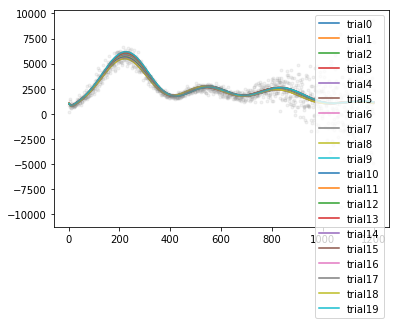

In [21]:
# To calculate the derivative of each parameter, create a function that does the following:
# - define a delta for each parameter
# - receive the parameters [1,2,3,4,5,6]
# - define a list that will contain the derivatives of each parameter d_dps
# - for par in parameter list
# - cmb1 = par+delta
# - cmb2 = par-delta
# - d_dp = (cmb1[2:1199+2]-cmb2[2:1199+2])/(2*delta)
# - save d_dp in the list
# - go to the next parameter in the list and repeat to calculate d_dp
# - create an empty matrix
# - define each column as each d_dp in the list d_dps 
# - return the matrix
# ------ outside the function
# - define the transpose of the matrix
# - define the matrix N
# - define the residuals
# - calculate delta_m
# - update the parameters with delta m

# a modified version of get_spectrum, with fixed tau and receives only 5 parameters
def get_spectrum2(pars,lmax=2000):
    #print('pars are ',pars)
    H0=pars[0]
    ombh2=pars[1]
    omch2=pars[2]
    tau=0.05
    As=pars[3]
    ns=pars[4]
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]    
    return tt

# the function that returns a matrix with the derivatives w.r.t each parameter
def derivative(pars,x):
    deltas = [0.1,0.001,0.01,1.0e-9,0.1] # delta depends on the parameter
    d_dps = []
    for i in range(len(pars)):
        delta = deltas[i]
        pars[i] = pars[i]+delta
        cmb1 = get_spectrum2(pars) 
        pars[i] = pars[i]-2*delta
        cmb2 = get_spectrum2(pars) 
        d_dp = (cmb1[2:1199+2]-cmb2[2:1199+2])/(2*delta)
        d_dps.append(d_dp)
        # reset the parameter to its initial value
        pars[i] = pars[i]+delta
    # the derivatives
    d0 = d_dps[0]    # w.r.t H0
    d1 = d_dps[1]    # w.r.t ombh2
    d2 = d_dps[2]    # w.r.t omch2
    d3 = d_dps[3]    # w.r.t As
    d4 = d_dps[4]    # w.r.t ns
    # create empty matrix
    npar = 5
    derivs = np.zeros([len(x),npar])
    derivs[:,0]=d0
    derivs[:,1]=d1
    derivs[:,2]=d2
    derivs[:,3]=d3
    derivs[:,4]=d4
    return derivs

wmap0,wmap1,wmap2=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt', usecols=(0,1,2), unpack=True)

guess=np.asarray([65,0.02,0.1,2.0e-9,0.96])
pars = guess.copy()

A0 = get_spectrum2(guess)
A0 = A0[2:1199+2]
chi_old = np.sum((A0-wmap1)**2/wmap2**2)
chi_thresh=0.5
# lists with the parameters after fit
fit_H0 = []
fit_ombh2 = []
fit_omch2 = []
fit_As = []
fit_ns = []
# list that saves the chi^2 of each fit
chis = []
# errors of each parameter after fit
errors_H0 = []
errors_ombh2 = []
errors_omch2 = []
errors_As = []
errors_ns = []
# errors squared
errors2_H0 = []
errors2_ombh2 = []
errors2_omch2 = []
errors2_As = []
errors2_ns = []

for i in range(20):
    A = get_spectrum2(pars)
    A = A[2:1199+2]
    derivs = derivative(pars,wmap0)
    A_T = derivs.transpose()
    resid = wmap1-A
    chi_new = np.sum(resid**2/wmap2**2)
    chis.append(chi_new)
    
    N = np.diag(wmap2**2)
    N_1 = np.linalg.inv(N)
    A_T_dot_N_1 = np.dot(A_T,N_1) 
    A_T_dot_N_1_dot_A = np.dot(A_T_dot_N_1,derivs) 
    A_T_dot_N_1_dot_resid = np.dot(A_T_dot_N_1,resid) 
    inverse = np.linalg.inv(A_T_dot_N_1_dot_A)
    delta_m = np.dot(inverse,A_T_dot_N_1_dot_resid)
    pars = guess+delta_m
    # calculate the error in the parameters
    # these are the errors squared, i'll keep them in a list
    error_p = np.diag(inverse)
    errors2_H0.append(error_p[0])
    errors2_ombh2.append(error_p[1])
    errors2_omch2.append(error_p[2])
    errors2_As.append(error_p[3])
    errors2_ns.append(error_p[4])
    # now i take the square root and save them into a list
    error_p_sq = np.sqrt(error_p)
    errors_H0.append(error_p_sq[0])
    errors_ombh2.append(error_p_sq[1])
    errors_omch2.append(error_p_sq[2])
    errors_As.append(error_p_sq[3])
    errors_ns.append(error_p_sq[4])
    # save parameters into a list
    fit_H0.append(pars[0])
    fit_ombh2.append(pars[1])
    fit_omch2.append(pars[2])
    fit_As.append(pars[3])
    fit_ns.append(pars[4])
    print("delta chisq:",np.abs(chi_old-chi_new))
    if (np.abs(chi_old-chi_new)<chi_thresh)&(i>0):
        print("stopping after "+repr(i)+" iterations.")
        break
    chi_old = chi_new
    plt.plot(wmap0,A,label="trial"+repr(i))
    plt.legend(loc="best")
    
plt.plot(wmap0,wmap1,'.', alpha = 0.1, color = "grey")   
chi_min = min(chis)
ind = chis.index(chi_min)
print("Best fit parameters:")
print(fit_H0[ind],fit_ombh2[ind],fit_omch2[ind],fit_As[ind],fit_ns[ind])
print("Errors in each parameter")
print(errors_H0[ind],errors_ombh2[ind],errors_omch2[ind],errors_As[ind],errors_ns[ind])


In [30]:
# These are the squares of the errors, of the best fit parameters
print(errors2_H0[ind],errors2_ombh2[ind],errors2_omch2[ind],errors2_As[ind],errors2_ns[ind])

5.420389385980716 2.7551310864332635e-07 2.768291304992016e-05 1.583527681405957e-21 0.00017234095416248884


As can be seen from the result of $\Delta \chi^2$, Newton's method does not converge until $\Delta \chi^2 \ll 1$. With 20 iterations, the results for $\Delta \chi^2$
were:

delta chisq: 0.0

delta chisq: 352.5674263930382

delta chisq: 270.32565020046536

delta chisq: 245.35897849257526

delta chisq: 177.4954865297143

delta chisq: 134.24316935859815

delta chisq: 82.57659426218675

delta chisq: 23.03417822670781

delta chisq: 10.948392350825543

delta chisq: 82.12209605322505

delta chisq: 98.4047483248396

delta chisq: 173.82732627487053

delta chisq: 175.14045249284732

delta chisq: 248.45469795268195

delta chisq: 238.1992896014449

delta chisq: 302.03915187069856

delta chisq: 284.419535541821

delta chisq: 336.69292999458844

delta chisq: 315.0957050464499

delta chisq: 352.74448195329865

Technically, I should use a "while delta_chi < chi_thresh" instead of a for, but I know it takes too long to converge, or maybe it will simply not converge. In that case, a Levenberg-Marquardt probably would solve the problem. Since I really don't know how to implement that method, I'll just keep the resulting parameters of the lowest $\Delta \chi^2$.

### Plotting the best fit

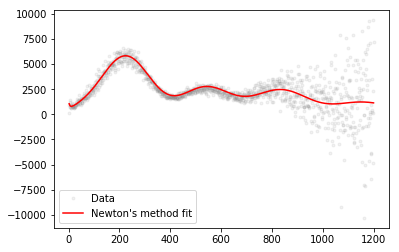

In [22]:
plt.figure()
plt.plot(wmap0,wmap1,'.',alpha = 0.1,color="grey", label="Data")
bestfit_pars = [66.98786609244435,0.020038296459833505,0.0978386797240545 ,
                1.9735648245585236e-09,0.9633504183699612]
bestfit_cmb = get_spectrum2(bestfit_pars)
bestfit_cmb = bestfit_cmb[2:1199+2]

plt.plot(wmap0,bestfit_cmb,"-",color="red", label="Newton's method fit")
plt.legend(loc="best")

### Fitting for $\tau$

The best fit parameters found were:

- $H_0$ = 66.98786609244435 
- $\omega_b h^2$ =  0.020038296459833505
- $\omega_c h^2$ = 0.0978386797240545
- $As$ = 1.9735648245585236e-09
- $ns$ = 0.9633504183699612

In the following I'll keep these parameters fixed, and I'll repeat Newton's method to find the best fit  $\tau$. This requires to modify a bit the previous code.
Also, since the best-fit parameters found are close to the initial guess, I would expect a small error in $\tau$.

stopping after 217 iterations.
Best fit tau is:
[0.050632]
With error:
[0.00183723]


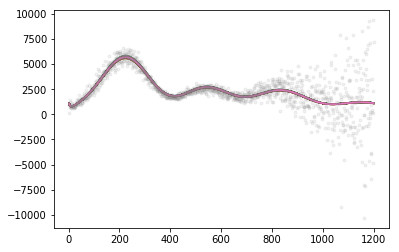

In [28]:
# first modify get_spectrum with all parameters fixed except tau
#66.98786609244435 
#0.020038296459833505 
#0.0978386797240545 
#1.9735648245585236e-09 
#0.9633504183699612
def get_spectrum3(pars,lmax=2000):
    #print('pars are ',pars)
    H0=66.98786609244435 
    ombh2=0.020038296459833505
    omch2=0.0978386797240545 
    tau=pars
    As=1.9735648245585236e-09
    ns=0.9633504183699612
    pars=camb.CAMBparams()
    pars.set_cosmology(H0=H0,ombh2=ombh2,omch2=omch2,mnu=0.06,omk=0,tau=tau)
    pars.InitPower.set_params(As=As,ns=ns,r=0)
    pars.set_for_lmax(lmax,lens_potential_accuracy=0)
    results=camb.get_results(pars)
    powers=results.get_cmb_power_spectra(pars,CMB_unit='muK')
    cmb=powers['total']
    tt=cmb[:,0]    #you could return the full power spectrum here if you wanted to do say EE
    return tt

# now modify the function that calculates the derivative
def derivative2(pars,x):
    delta = 0.01
    pars = pars+delta
    cmb1 = get_spectrum3(pars) 
    pars = pars-2*delta
    cmb2 = get_spectrum3(pars) 
    # the derivative with respect to tau
    d_dp = (cmb1[2:1199+2]-cmb2[2:1199+2])/(2*delta)
    pars = pars+delta
    npar = 1
    derivs = np.zeros([len(x),npar])
    derivs[:,0]=d_dp
    return derivs

# and now the last procedure
wmap0,wmap1,wmap2=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt', usecols=(0,1,2), unpack=True)

guess=np.asarray(0.05)
pars = guess.copy()

A0 = get_spectrum3(guess)
A0 = A0[2:1199+2]
chi_old = np.sum((A0-wmap1)**2/wmap2**2)
chi_thresh=0.5
fit_tau = []
errors_tau = []
errors2_tau = []

for i in range(220):
    A = get_spectrum3(pars)
    A = A[2:1199+2]
    derivs = derivative2(pars,wmap0)
    A_T = derivs.transpose()
    resid = wmap1-A
    chi_new = np.sum(resid**2/wmap2**2)
    chis.append(chi_new)
    N = np.diag(wmap2**2)
    N_1 = np.linalg.inv(N)
    A_T_dot_N_1 = np.dot(A_T,N_1) 
    A_T_dot_N_1_dot_A = np.dot(A_T_dot_N_1,derivs) 
    A_T_dot_N_1_dot_resid = np.dot(A_T_dot_N_1,resid) 
    inverse = np.linalg.inv(A_T_dot_N_1_dot_A)
    # update parameters
    delta_m = np.dot(inverse,A_T_dot_N_1_dot_resid)
    pars = guess+delta_m
    # save parameters into a list
    fit_tau.append(pars)
    # calculate the error squared
    error_p = np.diag(inverse)
    # add to list
    errors2_tau.append(error_p)
    # calculate the square root to get the actual error and add to a list
    error_p_sq = np.sqrt(error_p)
    errors_tau.append(error_p_sq)
    #print("delta chisq:",np.abs(chi_old-chi_new))
    if (np.abs(chi_old-chi_new)<chi_thresh)&(i>0):
        print("stopping after "+repr(i)+" iterations.")
        break
    chi_old = chi_new
    plt.plot(wmap0,A,label="trial"+repr(i))
    #plt.legend(loc="best")
plt.plot(wmap0,wmap1,'.', alpha = 0.1, color = "grey")      
chi_min = min(chis)
ind = chis.index(chi_min)
print("Best fit tau is:")
print(fit_tau[ind])
print("With error:")
print(errors_tau[ind])



In [47]:
print(errors2_tau[ind])


[3.37539689e-06]


<Figure size 432x288 with 0 Axes>

Here it worked! After 217 iterations (~1 hr running) the condition $\Delta \chi^2 \ll 1$ is satified! (Or almost, since I set a threshold of 0.5, which is not muuuuch lower than 1).

## Problem 3

In [78]:
def take_step_cov(covmat):
    mychol=np.linalg.cholesky(covmat)
    return np.dot(mychol,np.random.randn(covmat.shape[0]))

wmap0,wmap1,wmap2=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt', usecols=(0,1,2), unpack=True)

# The chain starts with these parameters
#params = np.asarray([66.98786609244435,0.020038296459833505,0.0978386797240545,0.050632,1.9735648245585236e-09,0.9633504183699612])
params = np.asarray([65,0.02,0.1,0.05,2.0e-9,0.96])
# Calculate the model
y_true=get_spectrum(params)
y_true = y_true[2:1199+2]

# Number of steps i'm going to take

nstep = 2000

#--------
# The square of the errors are:
# H0 = 5.420389385980716 
# ombh2 = 2.7551310864332635e-07 
# omch2 = 2.768291304992016e-05 
# As = 1.583527681405957e-21 
# ns = 0.00017234095416248884
# tau = 3.37539689e-06
# and the array par_errors contains these values

#par_errors = np.asarray([errors2_H0[ind],errors2_ombh2[ind],errors2_omch2[ind],errors2_tau[ind],errors2_As[ind],errors2_ns[ind]])

# Because running Newton's method occupies too much memory, I will just save the results
# and use them tu run the MCMC

par_errors = np.asarray([5.420389385980716,2.7551310864332635e-07,2.768291304992016e-05,
                        3.37539689e-06,1.583527681405957e-21,0.00017234095416248884])
mycov = np.diag(par_errors)


npar=len(params)
chains_new=np.zeros([nstep,npar])
# calculate chi^2
fun = get_spectrum(params)
fun = fun[2:1199+2]
chisq=np.sum((wmap1-fun)**2/wmap2**2)
#scale_fac=0.1
chisqvec_new=np.zeros(nstep)
for i in range(nstep):
    #print("i:",i)
    # update parameters
    new_params=params+take_step_cov(mycov)
    #print("new pars:",new_params)
    # check here if tau is negative
    if new_params[3]<0:
        chains_new[i,:]=params
        chisqvec_new[i]=chisq
        print("negative tau found! Skipping step...")
        pass
    else:
        new_model=get_spectrum(new_params)
        new_model = new_model[2:1199+2]
        new_chisq=np.sum((wmap1-new_model)**2/wmap2**2) # add here the prior
    
        delta_chisq=new_chisq-chisq
        prob=np.exp(-0.5*delta_chisq)
        accept=np.random.rand(1)<prob
        if accept:
            params=new_params
            model=new_model
            chisq=new_chisq
        chains_new[i,:]=params
        chisqvec_new[i]=chisq
#np.savetxt("chains_output",chains_new)


### Plotting each chain
Here I plot the steps each of my parameters took. Clearly, none of them converged. I couldn't give more than 2000 steps because my computer ran out of memory! 

Text(0,0.5,'$ns$')

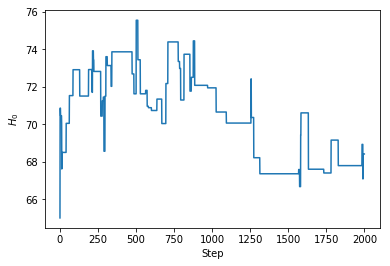

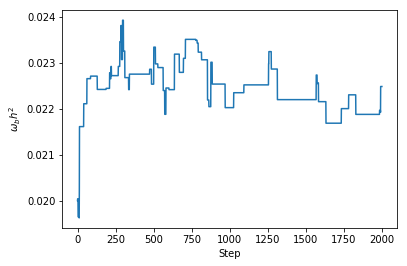

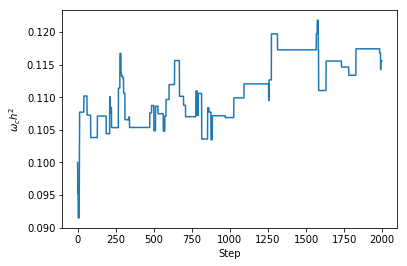

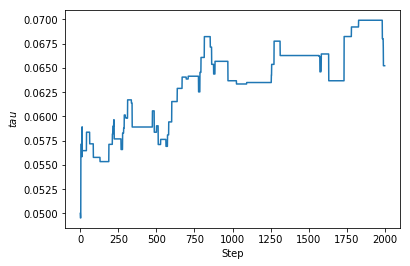

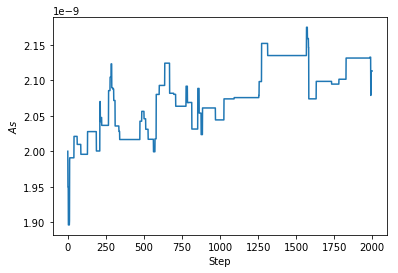

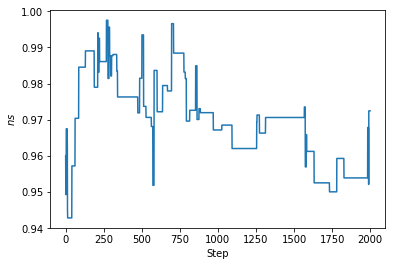

In [6]:
sample1 = np.loadtxt("chains_output", usecols = (0,1,2,3,4,5), unpack=True)
plt.figure()
plt.plot(sample1[0])
plt.xlabel("Step")
plt.ylabel("$H_{0}$")
plt.figure()
plt.plot(sample1[1])
plt.xlabel("Step")
plt.ylabel("$\omega_b h^2$")
plt.figure()
plt.plot(sample1[2])
plt.xlabel("Step")
plt.ylabel("$\omega_c h^2$")
plt.figure()
plt.plot(sample1[3])
plt.xlabel("Step")
plt.ylabel("$\ttau$")
plt.figure()
plt.plot(sample1[4])
plt.xlabel("Step")
plt.ylabel("$As$")
plt.figure()
plt.plot(sample1[5])
plt.xlabel("Step")
plt.ylabel("$ns$")

### Creating the corner plots

In the following lines I plot the confidence levels of my parameters at $1\sigma$, $2\sigma$ and $3\sigma$ (68%, 90% and 99%). The values reported in the title of each 1D plot correspond to the mean value of the probability distribution, while the errors correspond to the $1\sigma$ uncertainty. Note that since $As$ is really small ($\sim 10^{-9}$) the median value is 0 with 0 errors but it doesn't mean these are the actual values.

In [8]:
import corner
levels = (0.68,0.90,0.99)
labels = [r"$H_0$",r"$\omega_b h^2$",r"$\omega_c h^2$",r"$\tau$",r"As",r"ns" ]
#quantiles = (0.5,0.16,0.84)
sample2 = np.loadtxt("chains_output", usecols = (0,1,2,3,4,5))


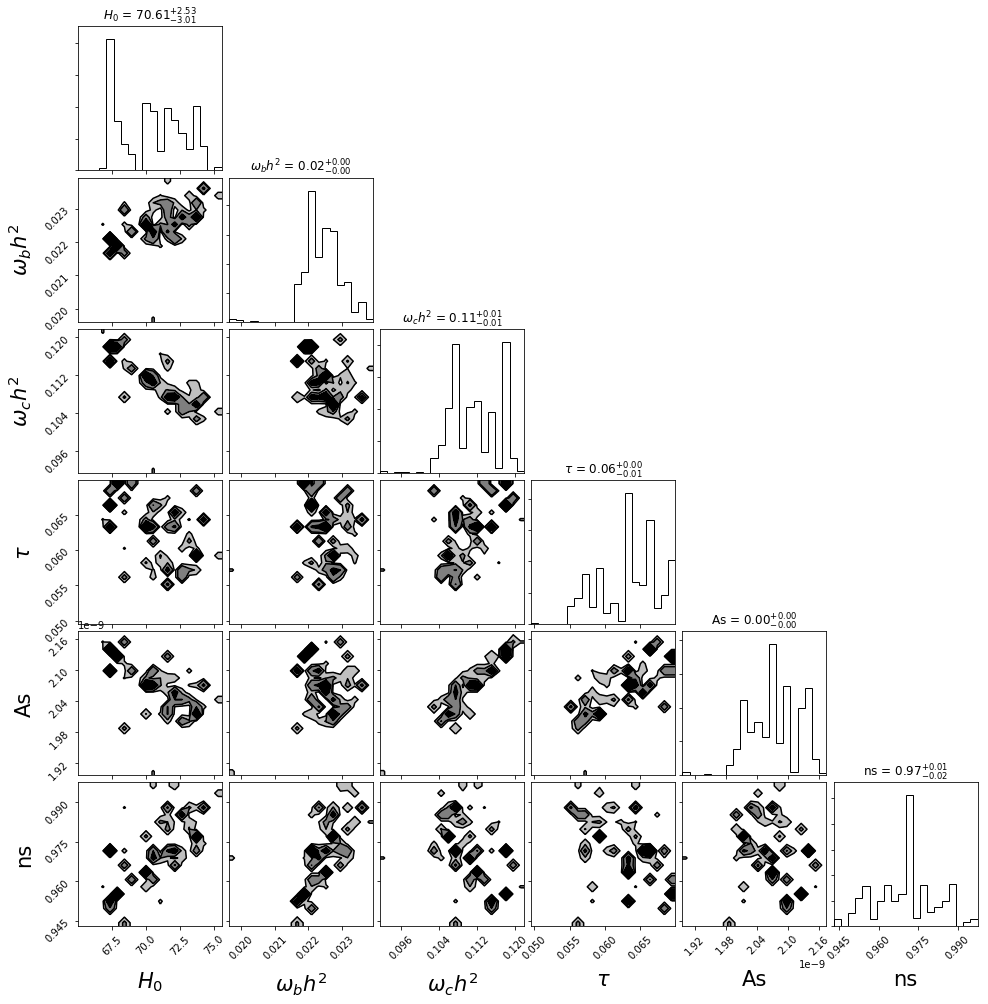

In [9]:
figure = corner.corner(sample2, show_titles=True,labels=labels, fill_contours=True, plot_datapoints=False, levels=levels, label_kwargs={'labelpad':30, 'fontsize':21},scale_hist=False)


The parameters found are:

- $H_0$ = 70.61 $^{+2.53}_{-3.01}$
- $\omega_b h^2$ =  0.0200 $^{+0.0004}_{-0.0004}$
- $\omega_c h^2$ = 0.11 $^{+0.01}_{-0.01}$
- $\tau$ = 0.06 $^{+0.0009}_{-0.01}$
- $As$ ~ 2.07 $^{+0.05}_{-0.05}$ $\times 10^{-9}$ 
- $ns$ = 0.97 $^{+0.01}_{-0.02}$

## Problem 4

### Adding the prior by weighting

In [6]:
# Extracting the chain results
parameters = np.loadtxt("chains_output", usecols = (0,1,2,3,4,5),unpack=True)

H0 = parameters[0]
ombh2 = parameters[1]
omch2 = parameters[2]
tau = parameters[3]
As = parameters[4]
ns = parameters[5]
    
H0_weight = H0*np.exp(-0.5*((tau-0.0544)/0.0073)**2)
ombh2_weight = ombh2*np.exp(-0.5*((tau-0.0544)/0.0073)**2)
omch2_weight = omch2*np.exp(-0.5*((tau-0.0544)/0.0073)**2)
tau_weight = tau*np.exp(-0.5*((tau-0.0544)/0.0073)**2)
As_weight = As*np.exp(-0.5*((tau-0.0544)/0.0073)**2)
ns_weight = ns*np.exp(-0.5*((tau-0.0544)/0.0073)**2)
weights = np.exp(-0.5*((tau-0.0544)/0.0073)**2)

parameters = np.asarray([H0_weight,ombh2_weight,omch2_weight,tau_weight,As_weight,ns_weight])
sample3 = parameters.T


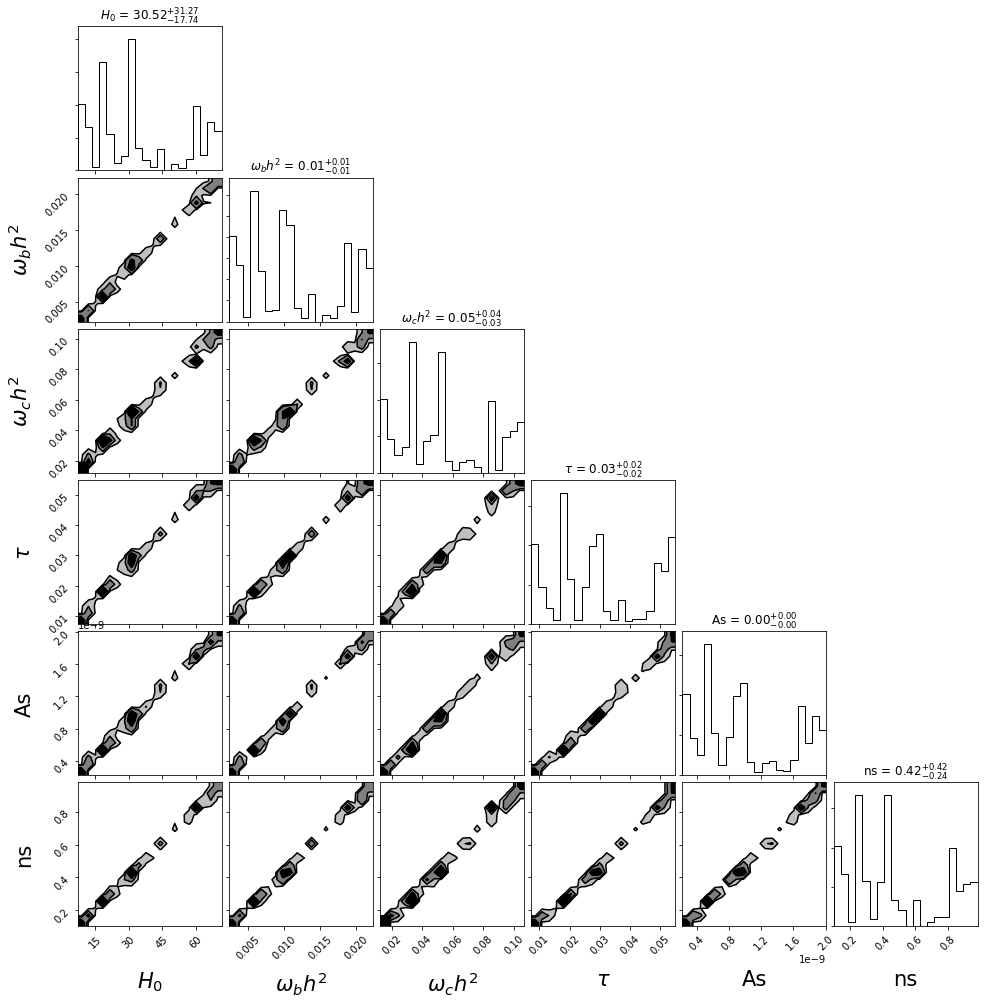

In [7]:
labels = [r"$H_0$",r"$\omega_b h^2$",r"$\omega_c h^2$",r"$\tau$",r"As",r"ns" ]
levels = (0.68,0.90,0.99)
figure = corner.corner(sample3, show_titles=True, labels=labels, fill_contours=True, plot_datapoints=False, levels=levels, label_kwargs={'labelpad':30, 'fontsize':21},scale_hist=False)

Since the parameters do not seem to improve by weighting this way, I will use the "weights" parameter that can be used when calling $corner.corner$. It corresponds the weight of each sample, in the form of an array (in this case, the $\tau$ array)

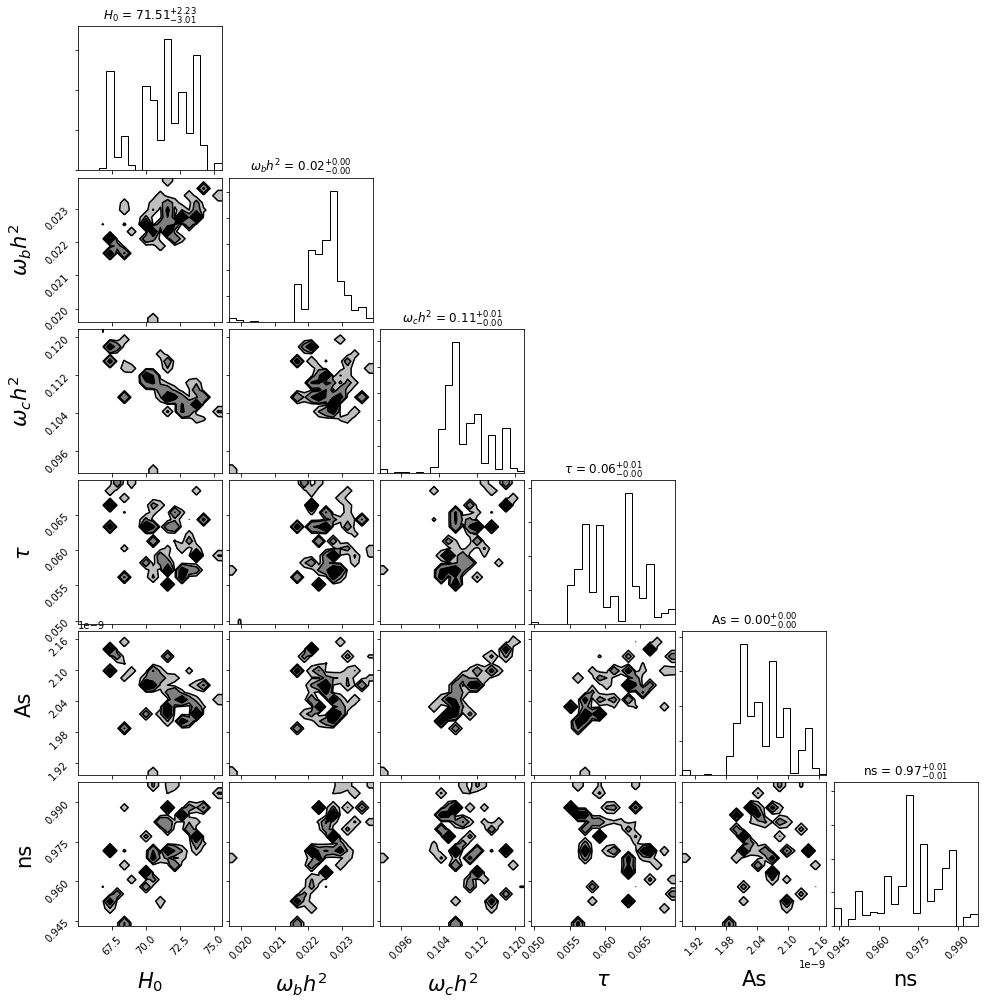

In [11]:
weights = np.exp(-0.5*((tau-0.0544)/0.0073)**2)
figure = corner.corner(sample2, show_titles=True, weights=weights, labels=labels, fill_contours=True, plot_datapoints=False, levels=levels, label_kwargs={'labelpad':30, 'fontsize':21},scale_hist=False)


The parameters seem more reasonable, however, I think $\tau$ should be 0.05 since I added the prior.
This motivated me to try running the chain again and add the prior instead of weighting.

### Running MCMC again adding the prior

In [16]:
def take_step_cov(covmat):
    mychol=np.linalg.cholesky(covmat)
    return np.dot(mychol,np.random.randn(covmat.shape[0]))

wmap0,wmap1,wmap2=np.loadtxt('wmap_tt_spectrum_9yr_v5.txt', usecols=(0,1,2), unpack=True)

params = np.asarray([65,0.02,0.1,0.05,2.0e-9,0.96])
# Calculate the model
y_true=get_spectrum(params)
y_true = y_true[2:1199+2]

# Number of steps i'm going to take

nstep = 2000

par_errors = np.asarray([5.420389385980716,2.7551310864332635e-07,2.768291304992016e-05,
                        3.37539689e-06,1.583527681405957e-21,0.00017234095416248884])
mycov = np.diag(par_errors)


npar=len(params)
chains_new=np.zeros([nstep,npar])
# calculate chi^2
fun = get_spectrum(params)
fun = fun[2:1199+2]
chisq=np.sum((wmap1-fun)**2/wmap2**2)
#scale_fac=0.5
chisqvec_new=np.zeros(nstep)

for i in range(nstep):
    # update parameters
    new_params=params+take_step_cov(mycov)
    #print("new pars:",new_params)
    # check here if tau is negative
    if new_params[3]<0:
        chains_new[i,:]=params
        chisqvec_new[i]=chisq
        print("negative tau found! Skipping step...")
        pass
    else:
        new_model=get_spectrum(new_params)
        new_model = new_model[2:1199+2]
        # adding the prior to the chi^2 calculation
        new_chisq=np.sum((wmap1-new_model)**2/wmap2**2)+((new_params[3]-0.0544)/0.0073)**2
        delta_chisq=new_chisq-chisq
        prob=np.exp(-0.5*delta_chisq)
        accept=np.random.rand(1)<prob
        if accept:
            params=new_params
            model=new_model
            chisq=new_chisq
        chains_new[i,:]=params
        chisqvec_new[i]=chisq
#np.savetxt("chains_weighted_output",chains_new)

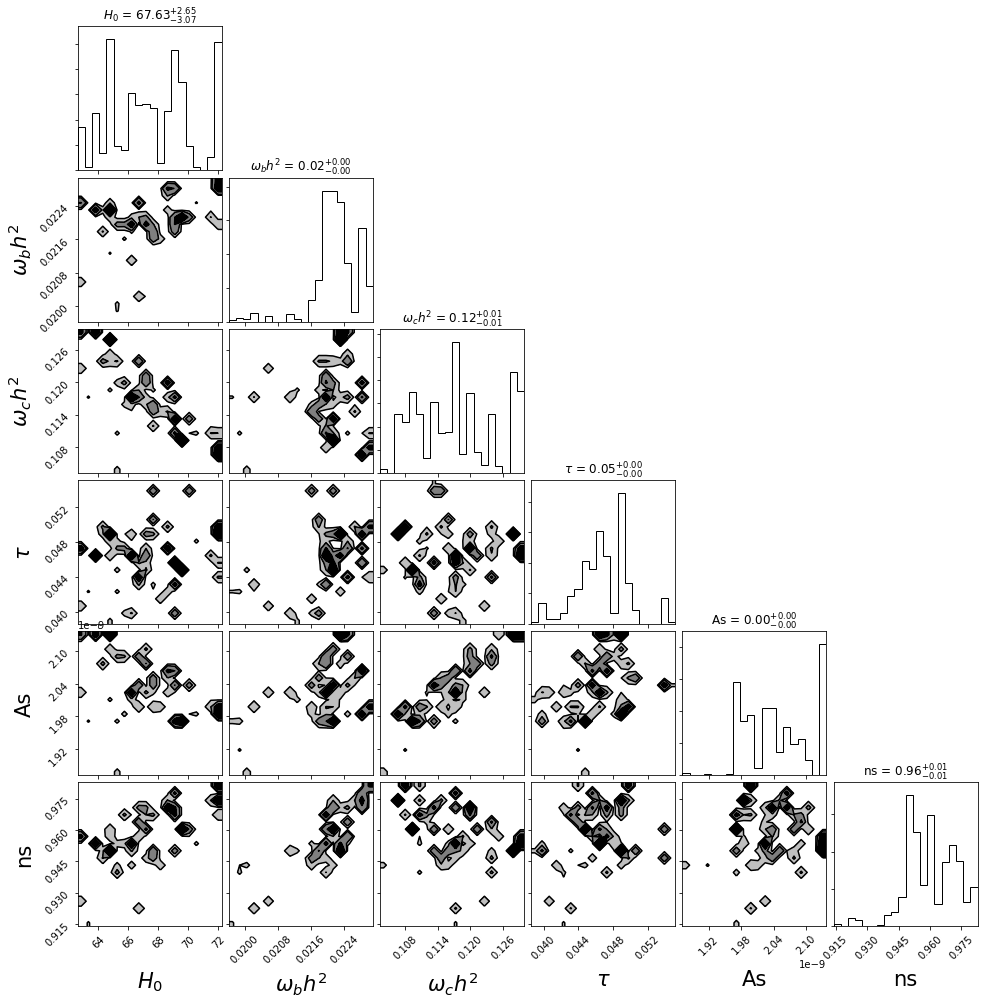

In [14]:
import corner
levels = (0.68,0.90,0.99)
labels = [r"$H_0$",r"$\omega_b h^2$",r"$\omega_c h^2$",r"$\tau$",r"As",r"ns" ]
sample3 = np.loadtxt("chains_weighted_output", usecols = (0,1,2,3,4,5))
figure = corner.corner(sample3, show_titles=True,labels=labels, fill_contours=True, plot_datapoints=False, levels=levels, label_kwargs={'labelpad':30, 'fontsize':21},scale_hist=False)

After running the MCMC again, parameters are even closer to the first guess, but more importantly, $\tau = 0.05$ which was expected. So finally, the new parameters are

- $H_0$ = 67.63 $^{+2.65}_{-3.07}$
- $\omega_b h^2$ =  0.020 $^{+0.002}_{-0.002}$
- $\omega_c h^2$ = 0.12 $^{+0.01}_{-0.01}$
- $\tau$ = 0.0500 $^{+0.0009}_{-0.005}$
- $As$ ~ 2.03 $^{+0.1}_{-0.05}$ $\times 10^{-9}$ 
- $ns$ = 0.96 $^{+0.01}_{-0.01}$